# Experiments

## 0.

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import networkx as nx

from time import time
import sys
sys.path.append('./src') ##

from sketching import Svdr
from experiment import Experiment

# import matplotlib_inline
# %matplotlib inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

In [2]:
%%bash
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Address sizes:       36 bits physical, 48 bits virtual
Byte Order:          Little Endian
CPU(s):              4
On-line CPU(s) list: 0-3
Vendor ID:           GenuineIntel
Model name:          Intel(R) Core(TM) i3-8130U CPU @ 2.20GHz
CPU family:          6
Model:               142
Thread(s) per core:  2
Core(s) per socket:  2
Socket(s):           1
Stepping:            10
CPU max MHz:         2201.0000
CPU min MHz:         0.0000
BogoMIPS:            4402.00
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm pni pclmulqdq dtes64 monitor est tm2 ssse3 fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave osxsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch fsgsbase bmi1 avx2 smep bmi2 erms invpcid mpx rdseed adx smap clflushopt ibrs ibpb stibp ssbd
Hypervisor vendor:

## 1. Hyperspectral Images (HSIs)

### 1.1. Washington, DC
https://github.com/JakobSig/HSI2RGB/blob/master/washington_hsi.mat

shape: (191, 307, 307)
min_elem: 0.0
max_elem: 1.0


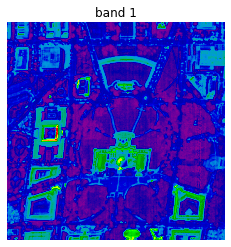

In [3]:
HSI_path = 'data/washington_hsi.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['Y']
HSI_data = np.moveaxis(HSI_data, -1, 0)
img = HSI_data / HSI_data.max()

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band], cmap='nipy_spectral')
plt.title(f'band {band}')
plt.axis('off')
plt.show()

In [4]:
ttSvdrList = []
ttSvdrList.append(Svdr('SVD'))
ttSvdrList.append(Svdr('HMT',   p=1,   k=44,  distr='rademacher'))
ttSvdrList.append(Svdr('Tropp', k=78,  l=520, distr='rademacher'))
ttSvdrList.append(Svdr('GN',    l=750,        distr='rademacher'))


hoSvdrList = []
hoSvdrList.append(Svdr('SVD'))
hoSvdrList.append(Svdr('HMT',   p=1,   k=68,  distr='rademacher'))
hoSvdrList.append(Svdr('Tropp', k=60,  l=819, distr='rademacher'))
hoSvdrList.append(Svdr('GN',    l=857,        distr='rademacher'))

In [5]:
hoRanks = [33, 40, 40]
ttRanks = [33, 33]
itersNum = 100

ex = Experiment(tensor=img, ttSvdrList=ttSvdrList, hoSvdrList=hoSvdrList)
ex.setRanks(hoRanks=hoRanks, ttRanks=ttRanks)

In [6]:
ex.runInitialSvd(ttsvd=True, hosvd=True)

TTSVD
----------------------------------------
time (s.)                    |   3.20713
negative elements (fro)      |   2.21814
negative elements (che)      |   0.06824
negative elements (density)  |   0.03150
relative error (fro)         |   0.18146
relative error (che)         |   0.45327
r2_score                     |   0.94200
compression                  |     51.32
----------------------------------------
STHOSVD
----------------------------------------
time (s.)                    |   3.35173
negative elements (fro)      |   2.08144
negative elements (che)      |   0.07091
negative elements (density)  |   0.02893
relative error (fro)         |   0.18450
relative error (che)         |   0.46223
r2_score                     |   0.94004
compression                  |    215.17
----------------------------------------


In [325]:
ex.timeit(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                 | 487.03 s.
HMT(1,44), Rad          | 147.66 s.
Tropp(78,520), Rad      | 229.24 s.
GN(750), Rad            | 257.43 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                 | 379.21 s.
HMT(1,68), Rad          | 240.53 s.
Tropp(60,819), Rad      | 145.89 s.
GN(857), Rad            | 253.94 s.
------------------------------------


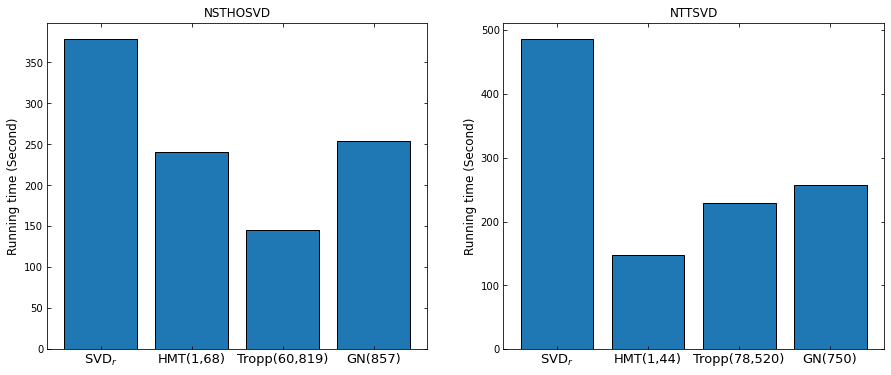

In [334]:
fig, ax = ex.plotRuntimes(figsize=(15, 6), ylabelsize=12, xticklabelsize=13, wspace=0.2)
# fig.savefig('figs/washington_runtimes.pdf', transparent=True, bbox_inches='tight')

In [7]:
ex.run(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                  | 387.47 s.
HMT(1,44), Rad           | 153.54 s.
Tropp(78,520), Rad       | 265.28 s.
GN(750), Rad             | 293.30 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                  | 438.53 s.
HMT(1,68), Rad           | 264.59 s.
Tropp(60,819), Rad       | 167.61 s.
GN(857), Rad             | 268.58 s.
------------------------------------


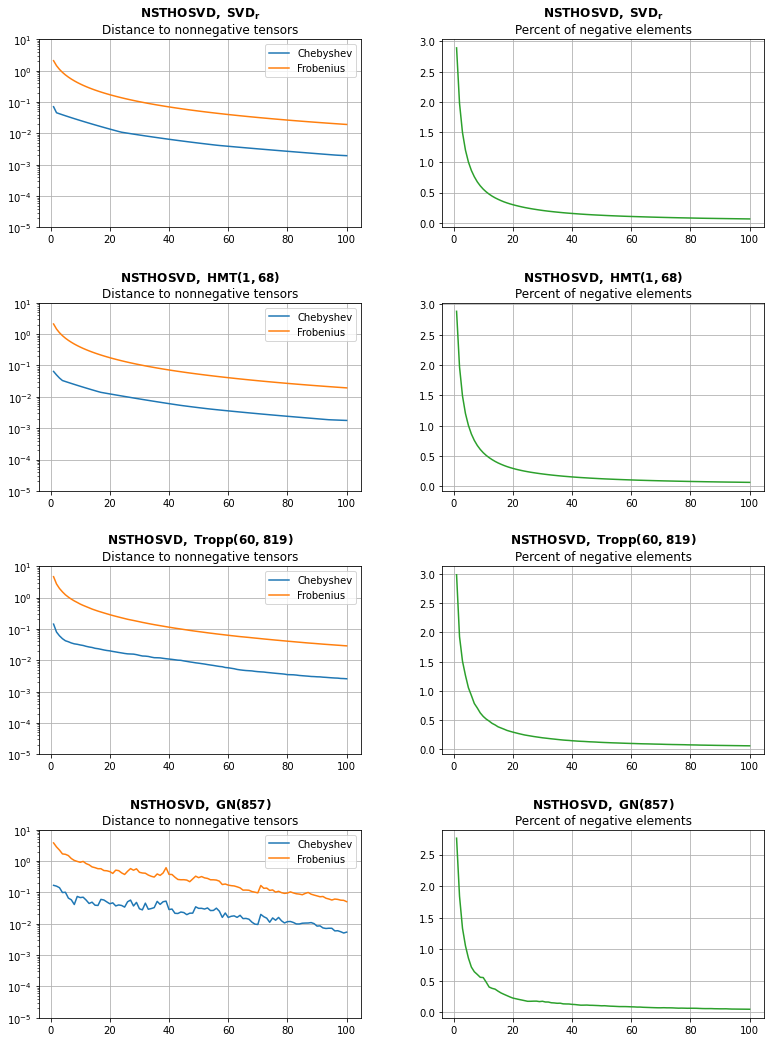

In [46]:
fig, ax = ex.plotConvergence(ttsvd=False)

# for i in range(ax.shape[0]):   
#     extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     extent.x0 -= 0.5
#     extent.x1 += 5.7
#     extent.y1 += 0.5
#     extent.y0 -= 0.3
#     fname = 'figs/washington_conv_ho_%d.pdf' % i
#     fig.savefig(fname, transparent=True, bbox_inches=extent)

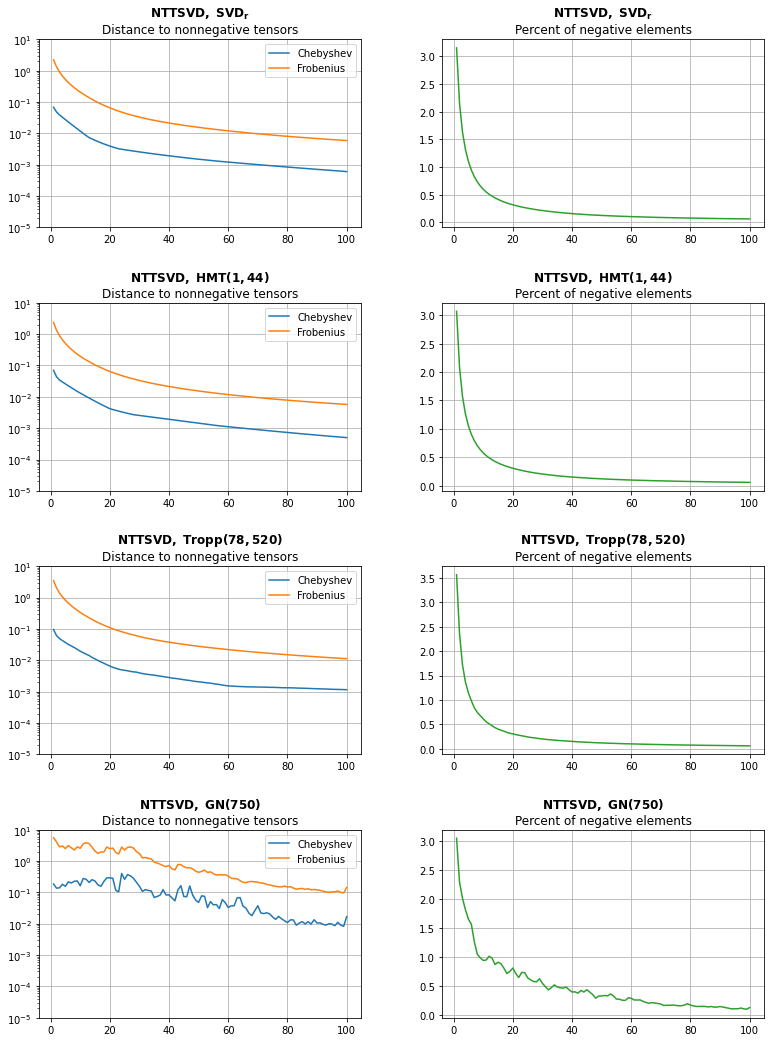

In [45]:
fig, ax = ex.plotConvergence(hosvd=False)

# for i in range(ax.shape[0]):   
#     extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#     extent.x0 -= 0.5
#     extent.x1 += 5.7
#     extent.y1 += 0.5
#     extent.y0 -= 0.3
#     fname = 'figs/washington_conv_tt_%d.pdf' % i
#     fig.savefig(fname, transparent=True, bbox_inches=extent)

In [10]:
ex.printErrors()

| NTTSVD                   | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.18158 |              0.45339 | 0.941921 |
| HMT(1,44), Rad           |              0.18587 |              0.44241 | 0.939145 |
| Tropp(78,520), Rad       |              0.21345 |              0.48372 | 0.919742 |
| GN(750), Rad             |              0.27674 |              0.80513 | 0.865093 |
------------------------------------------------------------------------------------
| NSTHOSVD                 | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.18467 |              0.46235 | 0.939925 |
| HMT(1,68), Rad           |              0.18550 |              0.45363 | 0.939390 |
| Tropp(60,819), Rad       |              0.23662 |      

In [11]:
ex.printNegativeElements()

| NTTSVD                   | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             0.0624946 |
| HMT(1,44), Rad           |             0.0594837 |
| Tropp(78,520), Rad       |             0.0571895 |
| GN(750), Rad             |             0.1335273 |
----------------------------------------------------
| NSTHOSVD                 | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             0.0628668 |
| HMT(1,68), Rad           |             0.0621668 |
| Tropp(60,819), Rad       |             0.0607336 |
| GN(857), Rad             |             0.0487513 |
----------------------------------------------------


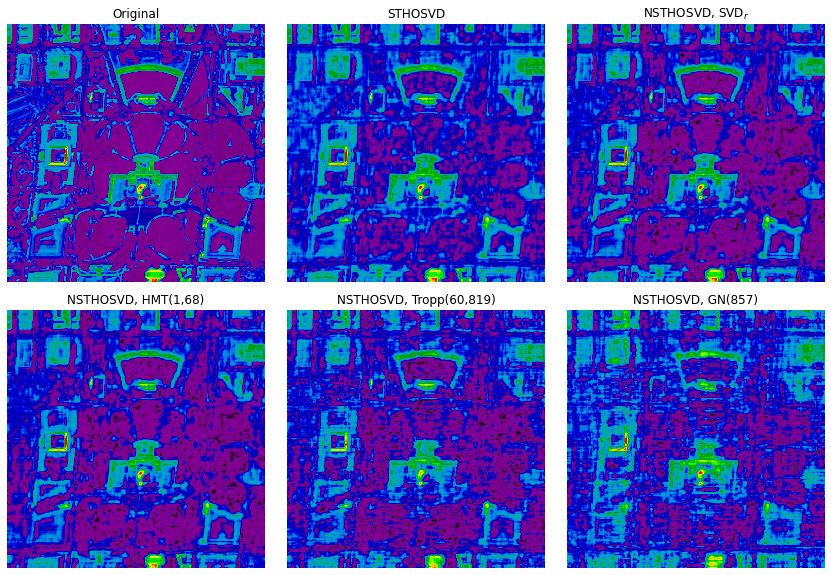

In [43]:
## HOSVD

fig, ax = ex.showApproximations(ttsvd=False, band=50, cmap='nipy_spectral')

fig.savefig('figs/washington_approximations_ho.pdf', transparent=True, bbox_inches='tight')

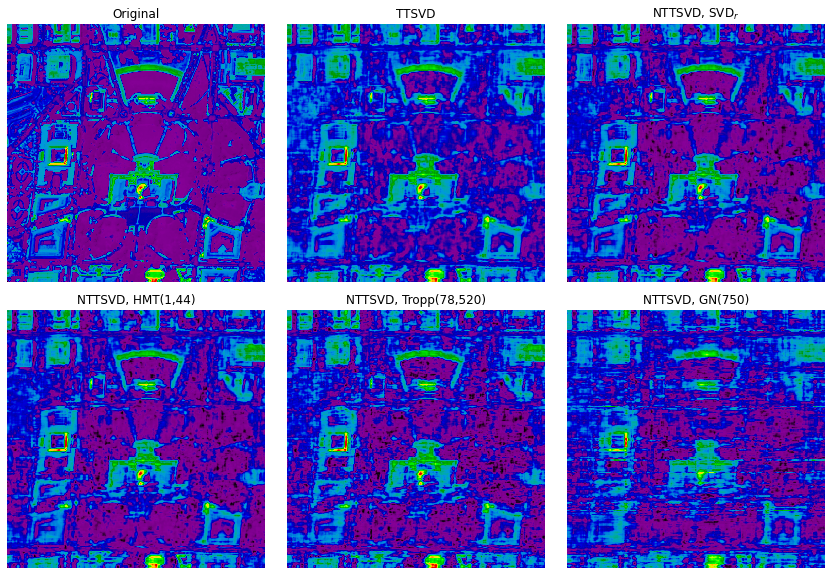

In [44]:
## TT-SVD

fig, ax = ex.showApproximations(hosvd=False, band=50, cmap='nipy_spectral')

fig.savefig('figs/washington_approximations_tt.pdf', transparent=True, bbox_inches='tight')

### 1.2. WHU-Hi-LongKou
http://rsidea.whu.edu.cn/resource_WHUHi_sharing.htm

shape: (270, 550, 400)
min_elem: 0.0
max_elem: 28.1


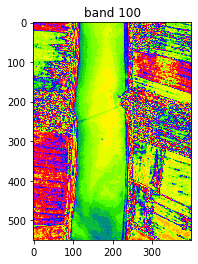

In [349]:
# original image

HSI_path = 'data/WHU_Hi_LongKou.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['WHU_Hi_LongKou']
HSI_data = np.moveaxis(HSI_data, -1, 0)

img = HSI_data

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 100
plt.imshow(img[band], cmap='prism')
plt.title(f'band {band}')
plt.show()

shape: (270, 200, 200)
min_elem: 0.0
max_elem: 1.0


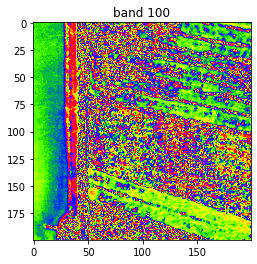

In [350]:
# subimage

HSI_path = 'data/WHU_Hi_LongKou.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['WHU_Hi_LongKou']
HSI_data = np.moveaxis(HSI_data, -1, 0)

img = HSI_data[:, 0:0+200, 200:200+200]
img /= img.max() #

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 100
plt.imshow(img[band], cmap='prism')
plt.title(f'band {band}')
plt.show()

In [351]:
ttSvdrList = []
ttSvdrList.append(Svdr('SVD'))
ttSvdrList.append(Svdr('HMT',   p=1,   k=15,  distr='rademacher'))
ttSvdrList.append(Svdr('Tropp', k=35,  l=400, distr='rademacher'))
ttSvdrList.append(Svdr('GN',    l=100,        distr='rademacher'))

hoSvdrList = []
hoSvdrList.append(Svdr('SVD'))
hoSvdrList.append(Svdr('HMT',   p=1,   k=17,  distr='rademacher')) 
hoSvdrList.append(Svdr('Tropp', k=40,  l=400, distr='rademacher'))
hoSvdrList.append(Svdr('GN',    l=200,        distr='rademacher'))


hoRanks = [17, 16, 17]
ttRanks = [15, 15]
itersNum = 100


ex = Experiment(tensor=img, ttSvdrList=ttSvdrList, hoSvdrList=hoSvdrList)
ex.setRanks(hoRanks=hoRanks, ttRanks=ttRanks)

In [352]:
ex.runInitialSvd()

TTSVD
----------------------------------------
time (s.)                    |   0.69294
negative elements (fro)      |   0.20429
negative elements (che)      |   0.03248
negative elements (density)  |   0.00004
relative error (fro)         |   0.08250
relative error (che)         |   0.28269
r2_score                     |   0.98432
compression                  |    207.49
----------------------------------------
STHOSVD
----------------------------------------
time (s.)                    |   0.73810
negative elements (fro)      |   0.03017
negative elements (che)      |   0.00640
negative elements (density)  |   0.00001
relative error (fro)         |   0.08297
relative error (che)         |   0.26382
r2_score                     |   0.98414
compression                  |    682.94
----------------------------------------


In [353]:
ex.timeit(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                 |  87.36 s.
HMT(1,15), Rad          |  43.89 s.
Tropp(35,400), Rad      |  43.15 s.
GN(100), Rad            |  39.70 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                 | 108.69 s.
HMT(1,17), Rad          |  44.76 s.
Tropp(40,400), Rad      |  50.29 s.
GN(200), Rad            |  60.52 s.
------------------------------------


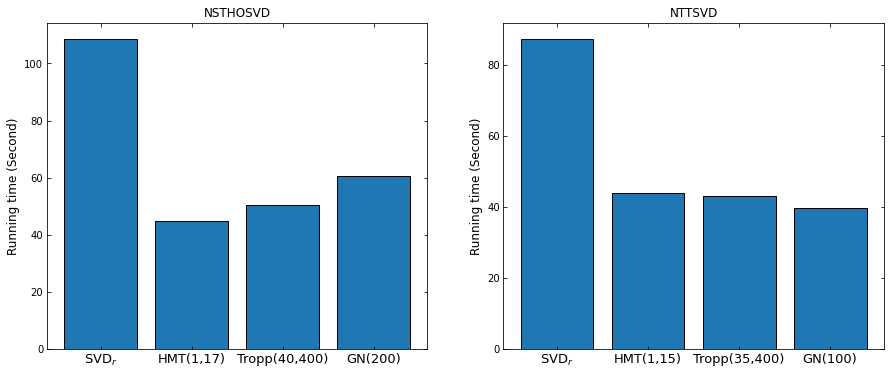

In [354]:
fig, ax = ex.plotRuntimes(figsize=(15, 6), ylabelsize=12, xticklabelsize=13, wspace=0.2)

fig.savefig('figs/whu_runtimes.pdf', transparent=True, bbox_inches='tight')

In [355]:
ex.run(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                  | 109.42 s.
HMT(1,15), Rad           |  75.84 s.
Tropp(35,400), Rad       |  76.94 s.
GN(100), Rad             |  69.70 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                  | 128.75 s.
HMT(1,17), Rad           |  68.21 s.
Tropp(40,400), Rad       |  70.32 s.
GN(200), Rad             |  85.25 s.
------------------------------------


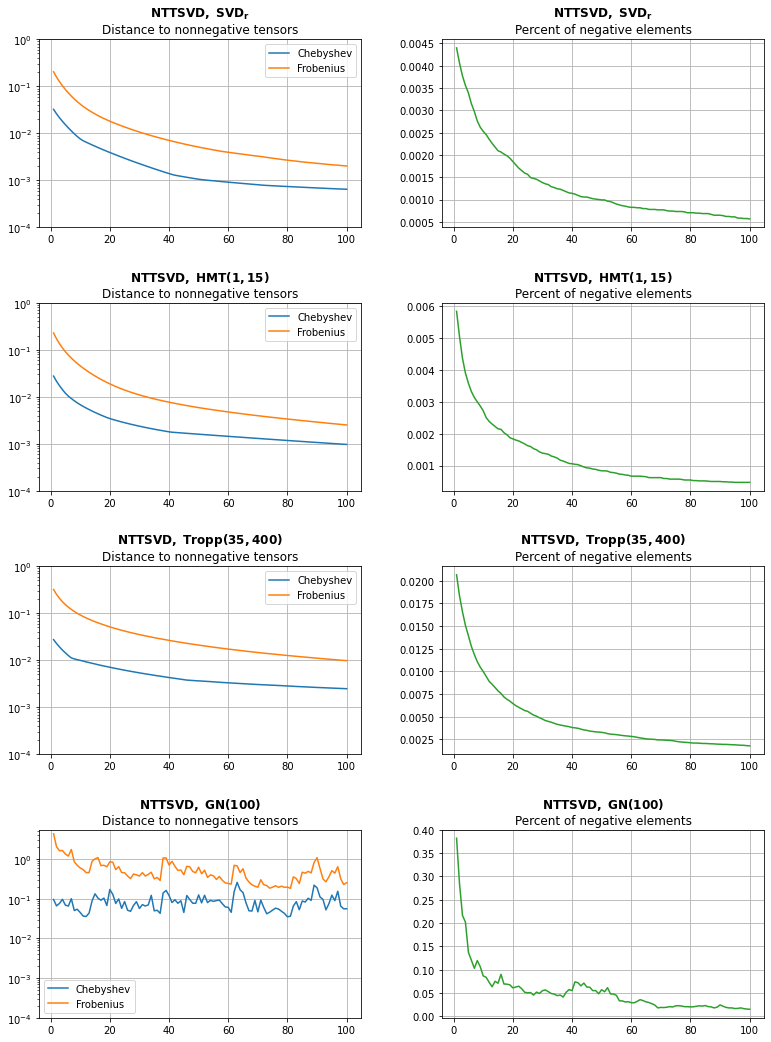

In [358]:
fig, ax = ex.plotConvergence(hosvd=False, figsize=(13, 18), wspace=0.25, yticks=[10**(-x) for x in range(0, 5)])

for i in range(ax.shape[0]):   
    extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.5
    extent.x1 += 5.7
    extent.y1 += 0.5
    extent.y0 -= 0.3
    fname = 'figs/whu_conv_tt_%d.pdf' % i
    fig.savefig(fname, transparent=True, bbox_inches=extent)

In [11]:
HSI_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:20:38 2011',
 '__version__': '1.0',
 '__globals__': [],
 'indian_pines': array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
         [2580, 4266, 4502, ..., 1029, 1020, 1000],
         [3687, 4266, 4421, ..., 1030, 1016, 1009],
         ...,
         [2570, 3890, 4320, ..., 1021, 1015, 1025],
         [3170, 4130, 4320, ..., 1024, 1020, 1011],
         [3172, 3890, 4316, ..., 1034, 1016, 1015]],
 
        [[2576, 4388, 4334, ..., 1030, 1006, 1015],
         [2747, 4264, 4592, ..., 1039, 1015, 1020],
         [2750, 4268, 4423, ..., 1026, 1015, 1020],
         ...,
         [3859, 4512, 4605, ..., 1035, 1015,  996],
         [3686, 4264, 4690, ..., 1012, 1020, 1014],
         [2744, 4268, 4597, ..., 1019, 1016, 1010]],
 
        [[2744, 4146, 4416, ..., 1029, 1025, 1010],
         [2576, 4389, 4416, ..., 1021, 1011, 1000],
         [2744, 4273, 4420, ..., 1033, 1010, 1014],
         ...,
         [2570, 4

shape: (220, 145, 145)
min_elem: 0.0
max_elem: 0.9


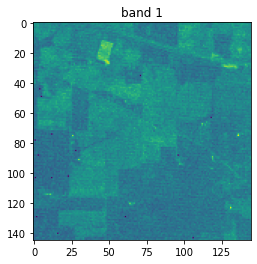

In [16]:
# [min, max] -> [0, 1]

HSI_path = 'data/P.mat'
HSI_mat = spio.loadmat(HSI_path)
HSI_data = HSI_mat['indian_pines']
HSI_data = np.moveaxis(HSI_data, -1, 0)

img = HSI_data
img = (img - img.min()) / img.max()

print('shape: %s\nmin_elem: %.1f\nmax_elem: %.1f' % (img.shape, img.min(), img.max()))
band = 1
plt.imshow(img[band])
plt.title(f'band {band}')
plt.show()

In [215]:
HSI_mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:21:46 2011',
 '__version__': '1.0',
 '__globals__': [],
 'paviaU': array([[[ 647,  499,  464, ..., 3221, 3238, 3250],
         [ 604,  546,  527, ..., 2442, 2464, 2528],
         [ 621,  746,  556, ..., 2308, 2345, 2361],
         ...,
         [ 524,  525,  598, ..., 2936, 2940, 2950],
         [ 528,  330,   70, ..., 2737, 2774, 2829],
         [ 711,  483,  423, ..., 2562, 2539, 2488]],
 
        [[ 705,  681,  668, ..., 2607, 2607, 2609],
         [ 891,  692,  453, ..., 1581, 1561, 1522],
         [ 547,  511,  604, ..., 1535, 1531, 1538],
         ...,
         [1149,  658,  434, ..., 3247, 3251, 3277],
         [ 917, 1004,  743, ..., 2828, 2806, 2808],
         [1037,  849,  547, ..., 2491, 2527, 2522]],
 
        [[1084,  875,  706, ..., 2108, 2167, 2183],
         [ 335,  517,  611, ..., 1105, 1109, 1095],
         [1042,  683,  318, ...,  806,  791,  814],
         ...,
         [ 799,  693,  

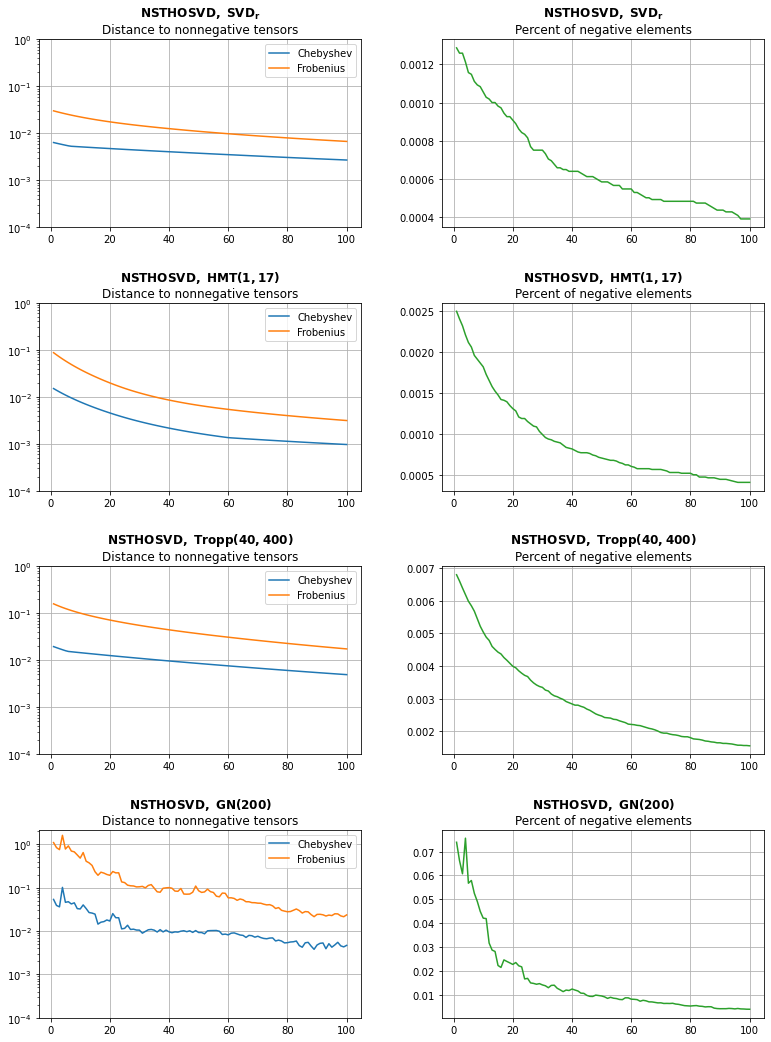

In [359]:
fig, ax = ex.plotConvergence(ttsvd=False, figsize=(13, 18), wspace=0.25, yticks=[10**(-x) for x in range(0, 5)])

for i in range(ax.shape[0]):   
    extent = ax[i,0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.5
    extent.x1 += 5.7
    extent.y1 += 0.5
    extent.y0 -= 0.3
    fname = 'figs/whu_conv_ho_%d.pdf' % i
    fig.savefig(fname, transparent=True, bbox_inches=extent)

In [360]:
ex.printErrors()

| NTTSVD                   | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.08250 |              0.28257 | 0.984317 |
| HMT(1,15), Rad           |              0.08765 |              0.26691 | 0.982299 |
| Tropp(35,400), Rad       |              0.09759 |              0.29784 | 0.978055 |
| GN(100), Rad             |              0.14556 |              0.50611 | 0.951179 |
------------------------------------------------------------------------------------
| NSTHOSVD                 | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.08297 |              0.26382 | 0.984137 |
| HMT(1,17), Rad           |              0.08706 |              0.28637 | 0.982537 |
| Tropp(40,400), Rad       |              0.09442 |      

In [361]:
ex.printNegativeElements()

| NTTSVD                   | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             0.0005648 |
| HMT(1,15), Rad           |             0.0004722 |
| Tropp(35,400), Rad       |             0.0017778 |
| GN(100), Rad             |             0.0147315 |
----------------------------------------------------
| NSTHOSVD                 | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             0.0003889 |
| HMT(1,17), Rad           |             0.0004074 |
| Tropp(40,400), Rad       |             0.0015463 |
| GN(200), Rad             |             0.0041111 |
----------------------------------------------------


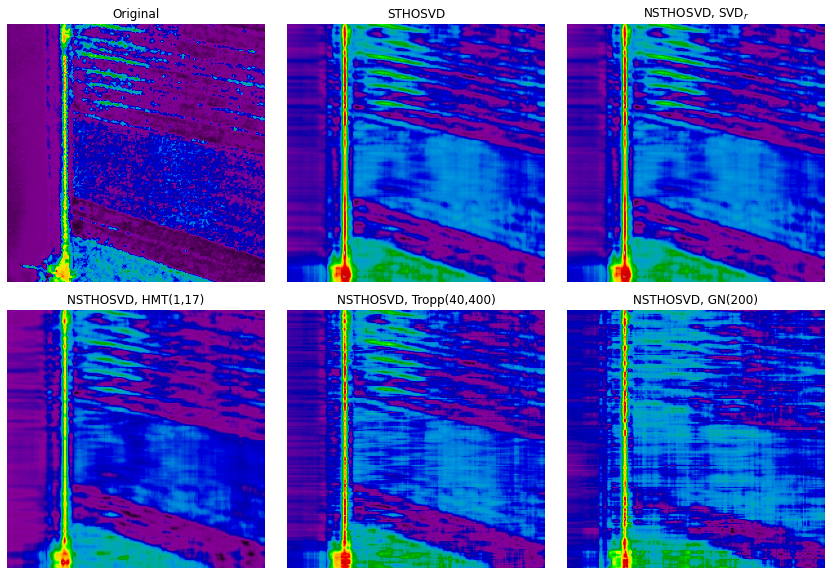

In [362]:
## HOSVD

fig, ax = ex.showApproximations(ttsvd=False, band=100, figsize=(15, 10), cmap='nipy_spectral')

fig.savefig('figs/whu_approximations_ho.pdf', transparent=True, bbox_inches='tight')

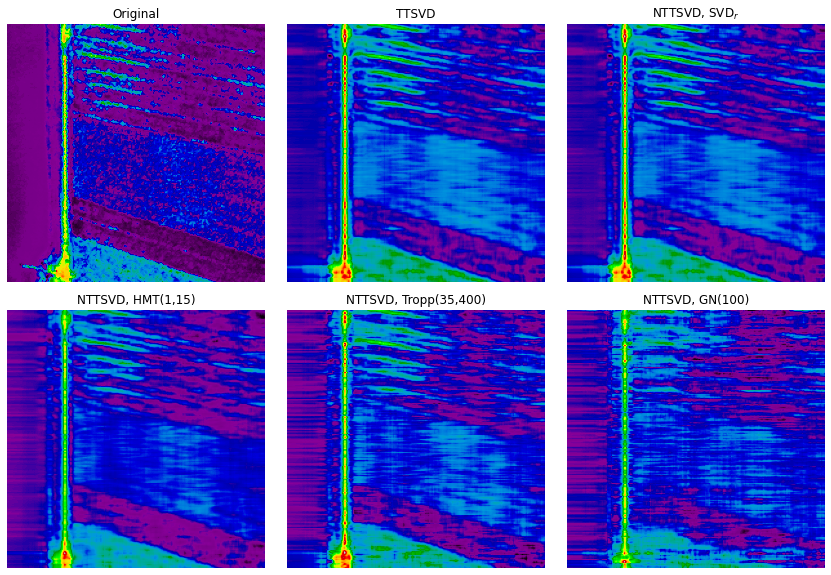

In [363]:
## TTSVD

fig, ax = ex.showApproximations(hosvd=False, band=100, figsize=(15, 10), cmap='nipy_spectral')

fig.savefig('figs/whu_approximations_tt.pdf', transparent=True, bbox_inches='tight')

### 1.4. Full-Spectral Autofluorescence Lifetime Microscopic Images
https://datashare.ed.ac.uk/handle/10283/4380

## 2. Multidimensional Gaussian mixture

In [112]:
t0 = time()

N = 128
N1 = N
N2 = N-10
N3 = N+10
A = np.zeros([N1, N2,N3])
cov_mat = np.random.uniform(0, 1, [3,3])
cov_mat = cov_mat @ cov_mat.T
cov_mat = cov_mat / np.linalg.norm(cov_mat)
cov_mat2 = np.random.uniform(0, 1, [3,3])
cov_mat2 = cov_mat2 @ cov_mat2.T
cov_mat2 = cov_mat2 / np.linalg.norm(cov_mat2)

cov_mat3 = np.random.uniform(0, 1, [3,3])
cov_mat3 = cov_mat3 @ cov_mat3.T
cov_mat3 = cov_mat3 / np.linalg.norm(cov_mat3)

h = 4. / N
for i in range(N1):
    for j in range(N2):
        for k in range(N3):
            point = np.array([i*h, j*h, k*h])
            A[i,j,k] = np.exp(-point @ cov_mat  @ point) +\
                       np.exp(-point @ cov_mat2 @ point) +\
                       np.exp(-point @ cov_mat3 @ point)
            
print('%.2f s.' % (time() - t0))

65.09 s.


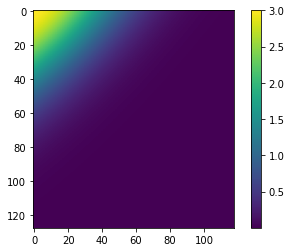

In [113]:
plt.imshow(A[:, :, 0])
plt.colorbar()

In [114]:
svdrList = []
svdrList.append(Svdr('SVD'))
svdrList.append(Svdr('HMT',   p=1,  k=6, distr='rademacher'))
svdrList.append(Svdr('Tropp', k=7,  l=9, distr='rademacher'))
svdrList.append(Svdr('GN',    l=70,      distr='rademacher'))

hoRanks = (4, 5, 5)
ttRanks = (4, 5)
itersNum = 100

ex = Experiment(tensor=A)
ex.setRanks(hoRanks=hoRanks, ttRanks=ttRanks)
ex.setSvdrList(svdrList)

In [115]:
ex.runInitialSvd()

TTSVD
----------------------------------------
time (s.)                    |   0.63044
negative elements (fro)      |   0.01234
negative elements (che)      |   0.00005
negative elements (density)  |   0.30225
relative error (fro)         |   0.00023
relative error (che)         |   0.00041
r2_score                     |   1.00000
compression                  |    585.16
----------------------------------------
STHOSVD
----------------------------------------
time (s.)                    |   0.55086
negative elements (fro)      |   0.01247
negative elements (che)      |   0.00005
negative elements (density)  |   0.27802
relative error (fro)         |   0.00023
relative error (che)         |   0.00040
r2_score                     |   1.00000
compression                  |   1101.67
----------------------------------------


In [116]:
ex.timeit(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                 |  46.21 s.
HMT(1,6), Rad           |   3.48 s.
Tropp(7,9), Rad         |   2.97 s.
GN(70), Rad             |   3.10 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                 |  45.63 s.
HMT(1,6), Rad           |   3.58 s.
Tropp(7,9), Rad         |   3.09 s.
GN(70), Rad             |   3.25 s.
------------------------------------


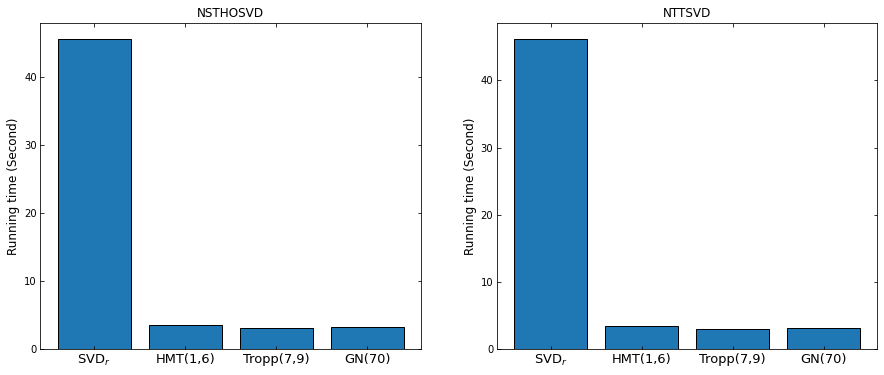

In [117]:
fig, ax = ex.plotRuntimes(figsize=(15, 6), ylabelsize=12, xticklabelsize=13, wspace=0.2)

In [118]:
ex.run(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                  |  66.88 s.
HMT(1,6), Rad            |   8.85 s.
Tropp(7,9), Rad          |   6.48 s.
GN(70), Rad              |   6.82 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                  |  58.95 s.
HMT(1,6), Rad            |   5.92 s.
Tropp(7,9), Rad          |   5.43 s.
GN(70), Rad              |   5.92 s.
------------------------------------


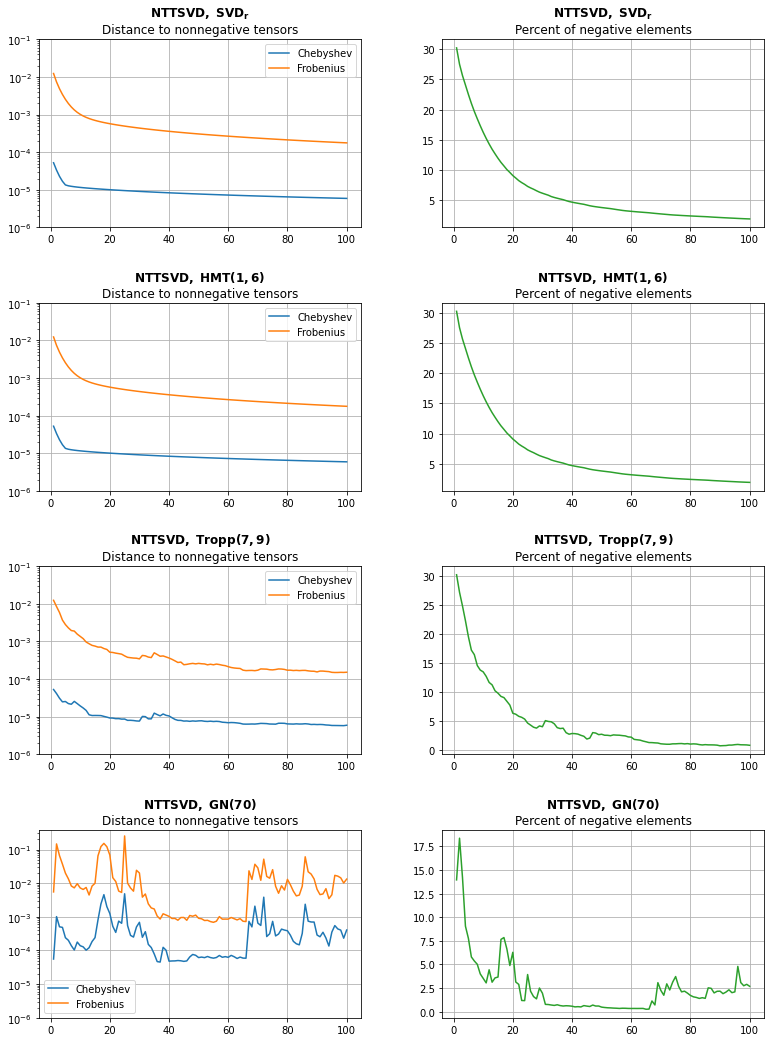

In [119]:
fig, ax = ex.plotConvergence(hosvd=False, yticks=[10**(-x) for x in range(1, 7)])

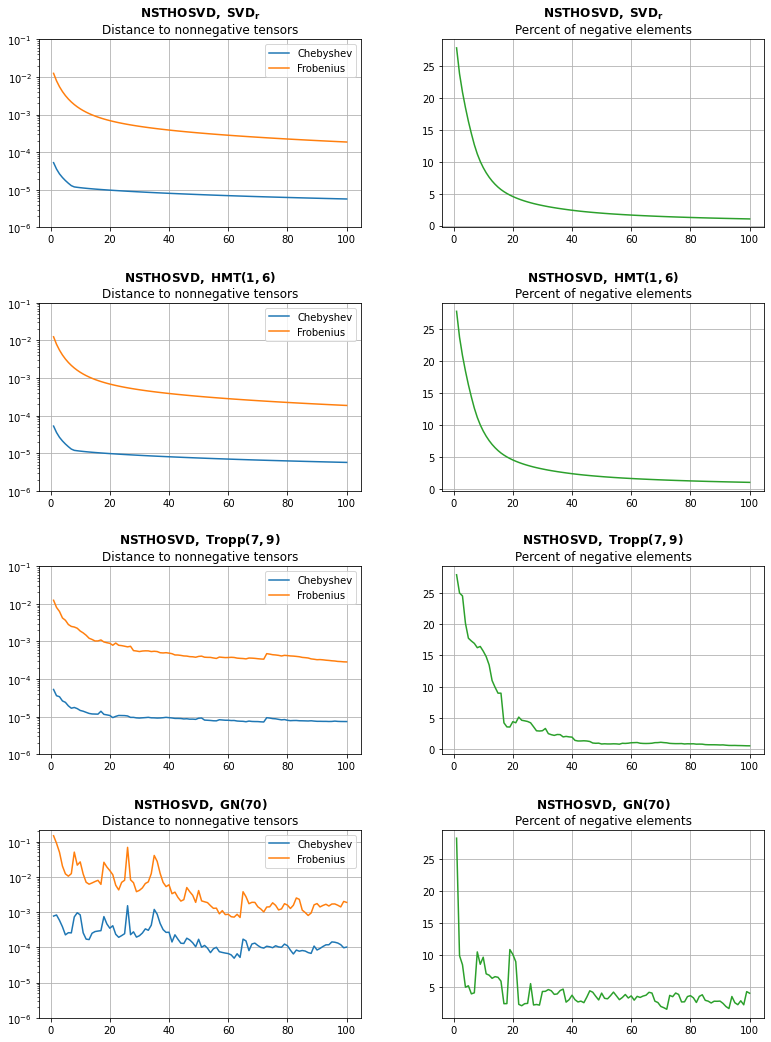

In [120]:
fig, ax = ex.plotConvergence(ttsvd=False, yticks=[10**(-x) for x in range(1, 7)])

In [121]:
ex.printErrors()

| NTTSVD                   | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.00024 |              0.00041 | 1.000000 |
| HMT(1,6), Rad            |              0.00024 |              0.00041 | 1.000000 |
| Tropp(7,9), Rad          |              0.00025 |              0.00047 | 1.000000 |
| GN(70), Rad              |              0.00342 |              0.00791 | 0.999987 |
------------------------------------------------------------------------------------
| NSTHOSVD                 | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.00024 |              0.00041 | 1.000000 |
| HMT(1,6), Rad            |              0.00024 |              0.00041 | 1.000000 |
| Tropp(7,9), Rad          |              0.00025 |      

In [122]:
ex.printNegativeElements()

| NTTSVD                   | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             1.9480395 |
| HMT(1,6), Rad            |             1.9480395 |
| Tropp(7,9), Rad          |             0.8947145 |
| GN(70), Rad              |             2.6793939 |
----------------------------------------------------
| NSTHOSVD                 | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             1.0276095 |
| HMT(1,6), Rad            |             1.0275616 |
| Tropp(7,9), Rad          |             0.5790769 |
| GN(70), Rad              |             3.9623346 |
----------------------------------------------------


# 3. Function Based Tensors

## 3.1 Hilbert Tensor

An Nth order Hilbert tensor is defined as follows
$$A(i_1, \dots, i_N) = \frac{1}{i_1 + \dots + i_N - N + 1}$$

In [431]:
shape = [128, 128, 128]

a = np.empty(shape=shape)

m, n, l = a.shape
for i in range(m):
    for j in range(n):
        for k in range(l):
            a[i, j, k] = 1 / ((i+1) + (j+1) + (k+1) - 3 + 1)

In [441]:
svdrList = []
svdrList.append(Svdr('SVD'))
svdrList.append(Svdr('HMT',   p=0,  k=30, distr='rademacher'))
svdrList.append(Svdr('Tropp', k=30, l=30, distr='rademacher'))
# svdrList.append(Svdr('GN',    l=30,      distr='rademacher'))

hoRanks = (3, 2, 4)
ttRanks = (3, 2)
itersNum = 250

ex = Experiment(tensor=a)
ex.setRanks(hoRanks=hoRanks, ttRanks=ttRanks)
ex.setSvdrList(svdrList)

In [442]:
ex.runInitialSvd()

TTSVD
----------------------------------------
time (s.)                    |   0.36381
negative elements (fro)      |   0.09768
negative elements (che)      |   0.01631
negative elements (density)  |   0.00006
relative error (fro)         |   0.07719
relative error (che)         |   0.36718
r2_score                     |   0.97986
compression                  |   1489.45
----------------------------------------
STHOSVD
----------------------------------------
time (s.)                    |   0.33502
negative elements (fro)      |   0.09754
negative elements (che)      |   0.01629
negative elements (density)  |   0.00006
relative error (fro)         |   0.07719
relative error (che)         |   0.36718
r2_score                     |   0.97986
compression                  |   1783.29
----------------------------------------


In [443]:
ex.timeit(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                 |  92.83 s.
HMT(0,30), Rad          |  15.23 s.
Tropp(30,30), Rad       |  18.59 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                 | 105.67 s.
HMT(0,30), Rad          |  15.22 s.
Tropp(30,30), Rad       |  17.79 s.
------------------------------------


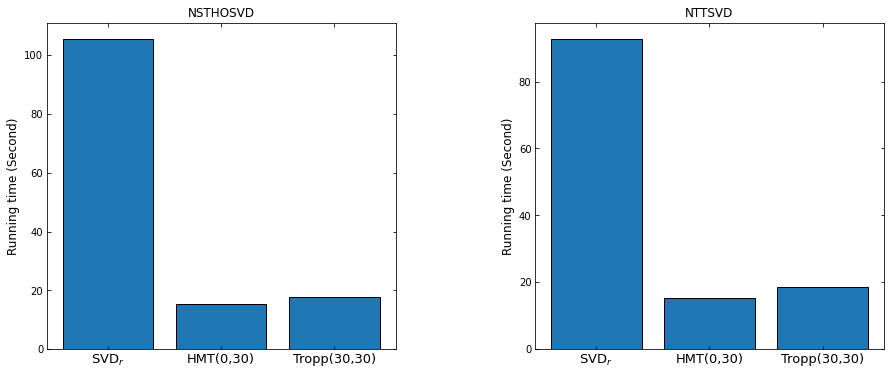

In [444]:
fig, ax = ex.plotRuntimes(figsize=(15,6), wspace=0.4)

In [445]:
ex.run(itersNum=itersNum)

NTTSVD
------------------------------------
SVD$_r$                  | 105.59 s.
HMT(0,30), Rad           |  22.16 s.
Tropp(30,30), Rad        |  22.76 s.
------------------------------------
NSTHOSVD
------------------------------------
SVD$_r$                  |  94.32 s.
HMT(0,30), Rad           |  19.12 s.
Tropp(30,30), Rad        |  19.59 s.
------------------------------------


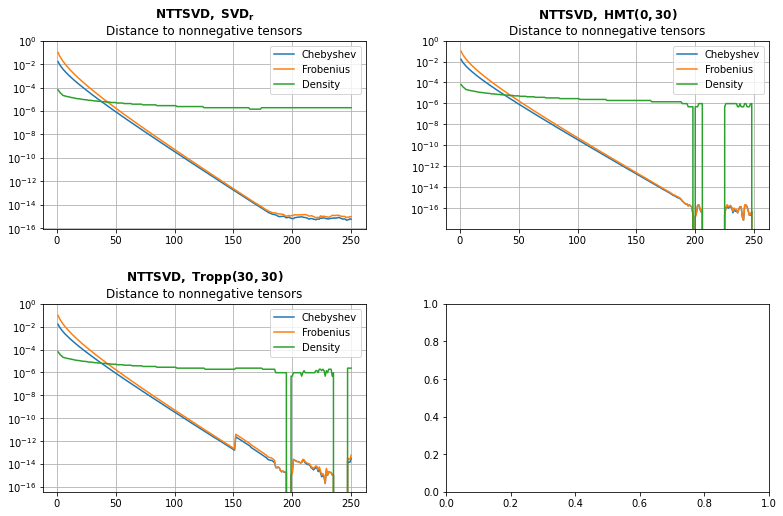

In [446]:
fig, ax = ex.plotConvergenceV2(hosvd=False)

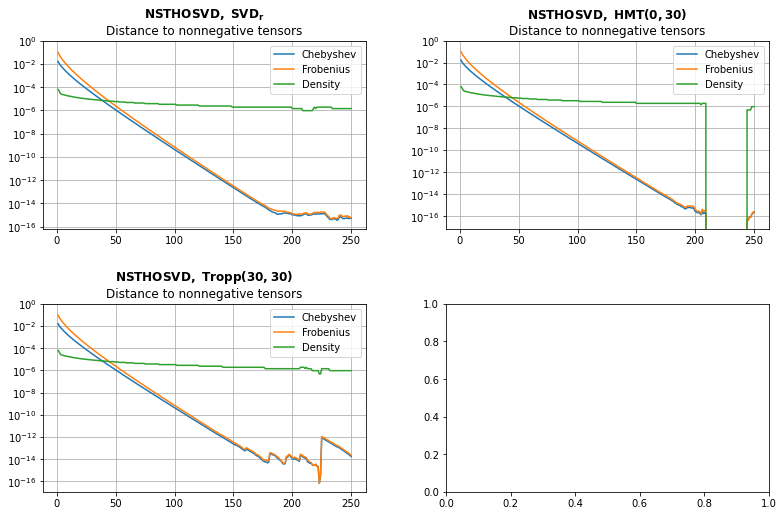

In [447]:
fig, ax = ex.plotConvergenceV2(ttsvd=False)

In [448]:
ex.printErrors()

| NTTSVD                   | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.07882 |              0.39445 | 0.979003 |
| HMT(0,30), Rad           |              0.07882 |              0.39445 | 0.979003 |
| Tropp(30,30), Rad        |              0.07882 |              0.39445 | 0.979003 |
------------------------------------------------------------------------------------
| NSTHOSVD                 | relative error (fro) | relative error (che) | r2_score |
------------------------------------------------------------------------------------
| SVD$_r$                  |              0.07895 |              0.39500 | 0.978935 |
| HMT(0,30), Rad           |              0.07895 |              0.39500 | 0.978935 |
| Tropp(30,30), Rad        |              0.07895 |              0.39500 | 0.978935 |
---------------------------------------------------------

# 4. Stochastic cubical tensors

In [17]:
# graph generators

gilbert    = lambda n: nx.to_numpy_array(nx.binomial_graph(n, p=0.5, directed=False))
smallw     = lambda n: nx.to_numpy_array(nx.navigable_small_world_graph(int(n ** 0.5)))
geo        = lambda n: nx.to_numpy_array(nx.random_geometric_graph(n, radius=(1.44/n)**0.5, dim=2, p=2))
pref       = lambda n: nx.to_numpy_array(nx.barabasi_albert_graph(n, m=2))
rank1      = lambda n: np.ones((n, n))

# erdrey     = lambda n: nx.to_numpy_array(nx.erdos_renyi_graph(n, p=0.5, directed=True))
# lockandkey = lambda n:

g = [gilbert, smallw, geo, pref, rank1]

def get_stochatic_tensor(n, m): ## PageRank, Alg. 2
    P = np.zeros((n, n**(m-1)))
    for i in range(1, n**(m-2) + 1):
        gr = g[np.random.choice(range(len(g)))]
        P[:, (i-1)*n:i*n] = gr(n)
    col_sums = P.sum(axis=0)
    zero_cols = np.where(col_sums == 0)
    for col in zero_cols:
        row = np.random.choice(range(n))
        P[row, col] = 1
    col_sums[col_sums == 0] = 1
    P /= col_sums
    return fold(P, mode=0, shape=(n,)*m)

### 4.1

In [801]:
def get_stochatic_tensor(shape):
    tensor = np.random.uniform(low=0.0, high=1.0, size=shape)
    mode_1 = unfold(tensor, mode=1)
    mode_1 = mode_1 / mode_1.sum(axis=0)
    return fold(mode_1, mode=1, shape=shape)

In [802]:
n = 128
shape = (n, n, n)
r = 10
ho_ranks = (r, r, r)
tt_ranks = (r, r)

a = get_stochatic_tensor(shape)

In [803]:
SVDR(a, ho_ranks, tt_ranks)

---------------------------------------
HOSVD
---------------------------------------
time (s.)                   |   0.46374
negative elements (fro)     |   0.00000
negative elements (che)     |   0.00000
negative elements (density) |   0.00000
relative error (fro)        |   0.49918
relative error (che)        |   0.57365
---------------------------------------
TTSVD
---------------------------------------
time (s.)                   |   0.40266
negative elements (fro)     |   0.00000
negative elements (che)     |   0.00000
negative elements (density) |   0.00000
relative error (fro)        |   0.49721
relative error (che)        |   0.58491
---------------------------------------


In [440]:
ex.printNegativeElements()

| NTTSVD                   | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             0.0021935 |
| HMT(0,30), Rad           |             0.0021935 |
| Tropp(30,30), Rad        |             0.0021935 |
----------------------------------------------------
| NSTHOSVD                 | negative elements (%) |
----------------------------------------------------
| SVD$_r$                  |             0.0022888 |
| HMT(0,30), Rad           |             0.0022888 |
| Tropp(30,30), Rad        |             0.0022888 |
----------------------------------------------------


(<Figure size 864x288 with 2 Axes>,
 array([<AxesSubplot:title={'center':'$\\bf{NTTSVD,\\ GN(10)}$\nDistance to nonnegative tensors'}>,
        <AxesSubplot:title={'center':'$\\bf{NSTHOSVD,\\ GN(10)}$\nDistance to nonnegative tensors'}>],
       dtype=object))

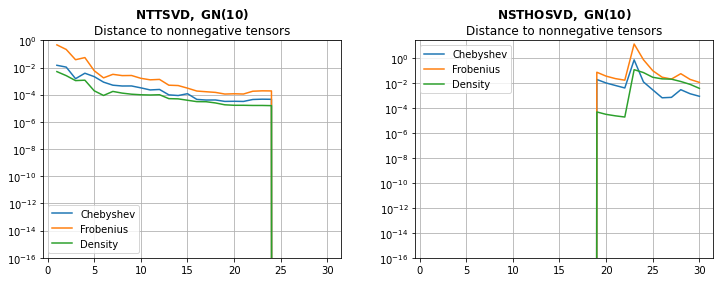

In [423]:
ex.plotConvergenceV2(figsize=(12, 3))